# Multiple linear regression

In [2]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [3]:
data=pd.read_csv('C:/Users/VC/Downloads/USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [8]:
X = data[[ 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']] #,'Avg. Area Income',
y = data['Price'] 

In [ ]:
## train test or split data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [7]:
## creating and training model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train,y_train)

LinearRegression()

In [12]:
## model evaluation

In [13]:
# print the intercept
print(lm.intercept_)

-1153964.8113179766


In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area House Age,165665.282601
Avg. Area Number of Rooms,118678.008968
Avg. Area Number of Bedrooms,8368.455155
Area Population,14.800604


In [15]:
## prediction from our model

In [17]:
predictions = lm.predict(X_test)
predictions

array([1273929.09027886, 1155942.28006043,  825704.66777628,
       1057584.99681401, 1267500.58905752, 1640794.40085562,
       1052845.73458003, 1007285.07123439,  931518.86503693,
       1250471.02197727, 1465823.24151784,  905689.83126711,
        860959.80950397, 1416750.44336161, 1074761.26216805,
       1570158.15474958, 1166375.18421455, 1356201.06905707,
       1415758.00853262, 1522939.86467704, 1129595.3163271 ,
        936482.90348623, 1078780.99268854, 1589014.24986312,
       1178779.67161545, 1161569.97186048, 1378156.45912103,
       1099183.0715385 , 1354166.95978214, 1541089.65810494,
       1406527.80691618,  942809.31917766, 1471401.40844688,
       1317505.87073832, 1281381.84243663, 1533489.88716415,
       1022370.21911958, 1069396.41264235, 1200979.99156621,
       1131970.15749861, 1393706.70505366, 1217469.09270886,
        978011.01787609,  937137.20947921, 1190699.91962156,
       1258167.10858189, 1778479.76737275, 1960108.33406167,
        980962.44678562,

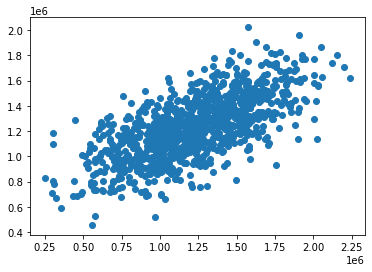

In [18]:
plt.scatter(y_test,predictions)

In [19]:
## residual histogram

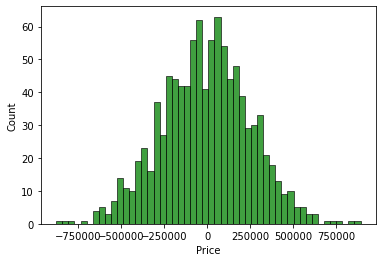

In [20]:
sns.histplot((y_test-predictions),bins=50,color='g');

In [21]:
from sklearn import metrics

In [22]:
print('R^2:',lm.score(X_train,y_train))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2: 0.5037550638702821
MAE: 205983.98460675977
MSE: 66898247204.67824
RMSE: 258646.95475624345


In [23]:
## creating and training the model using statsmodel

In [24]:
from statsmodels.api import OLS
#model  = OLS(y_train,X_train).fit()
#x_train = X_train
x_train = sm.add_constant(X_train)
model  = OLS(y_train,x_train).fit()

In [25]:
print(model.params)
print(model.summary())

const                          -1.153965e+06
Avg. Area House Age             1.656653e+05
Avg. Area Number of Rooms       1.186780e+05
Avg. Area Number of Bedrooms    8.368455e+03
Area Population                 1.480060e+01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1014.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:47:22   Log-Likelihood:                -55380.
No. Observations:                4000   AIC:                         1.108e+05
Df Residuals:                    3995   BIC:                         1.108e+05
Df Model:                           4                                         
Covariance Type:            nonrobust            

In [26]:
## prediction and evalution

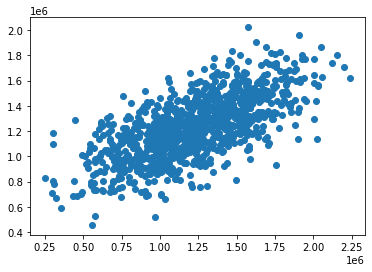

In [27]:
#pred = model.predict(X_test)
x_test = sm.add_constant(X_test)
pred = model.predict(x_test)
plt.scatter(y_test,pred)

In [28]:
print('R^2:',model.rsquared)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.5037550638702821
MAE: 205983.98460670703
MSE: 66898247204.598465
RMSE: 258646.95475608922
